# Vehicle Price prediction

## Goal
> Using CarDekho's vehicle dataset, we are going to predict the price of a vehicle which is up for resale.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
# Import dataset
dataset = pd.read_csv("car data.csv")

In [3]:
dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


## Exploratory Data Analysis

### 1. Automated EDA using Pandas-Profiling
* EDA is one of the most important part of a data science lifecycle. It is estimated that around ~60% of time goes into Data analysis (both feature engineering and EDA). <br/>

* Pandas-Profiling is a python package that generates a quick interactive data analysis report. This really reduces our effort to initially understand the data (on basic to intermediate level). 

<b>For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:</b><br/>

1. <b>Type inference</b>: detect the types of columns in a dataframe.
2. <b>Essentials</b>: type, unique values, missing values
3. <b>Quantile statistics</b> like minimum value, Q1, median, Q3, maximum, range, interquartile range
4. <b>Descriptive statistics</b> like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
5. <b>Most frequent values</b>
6. <b>Histogram</b>
7. <b>Correlations</b> highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
8. <b>Missing values matrix, count, heatmap and dendrogram of missing values</b>
9. <b>Text analysis</b> learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.
10. <b>File and Image analysis</b> extract file sizes, creation dates and dimensions and scan for truncated images or those containing EXIF information.

In [4]:
profile = ProfileReport(dataset, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()

# Or you can simply run the last line instead of first 2
# daset.profile_report()

### 2. Manual Exploratory Data Analysis

In [5]:
# Check dimentions of the dataset
dataset.shape

(301, 9)

In [6]:
# Check unique values of each columns
for i in dataset.columns.to_list():
    print("\nUnique values in {} column are:".format(i))
    print(dataset[i].unique())


Unique values in Car_Name column are:
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 

In [7]:
# Check how many missing values per column
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# View the Quantitative data (columns which contains numbers)
# This gives us statistical information of numerical columns like std, min, max, mean, count etc
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Text(0.5, 0, 'Year')

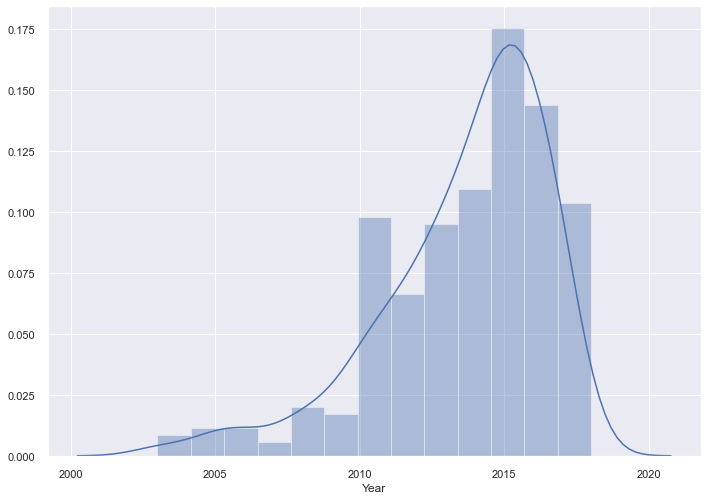

In [9]:
# Create a histogram chart
sns.set(rc={'figure.figsize':(11.7,8.27)}) # using this command you can set custom size of plot
sns.distplot(dataset['Year'])
plt.xlabel("Year")

Text(0.5, 1.0, 'Year vs Selling Price')

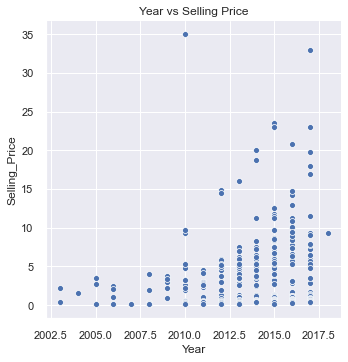

In [10]:
# Visualize the data distribution between Selling_price and Year.
# As we can see it is clearly visible that the newer the car, the better selling price.
sns.relplot(x="Year", y="Selling_Price", data=dataset)
plt.title("Year vs Selling Price")

Text(0.5, 1.0, 'Year vs Selling Price')

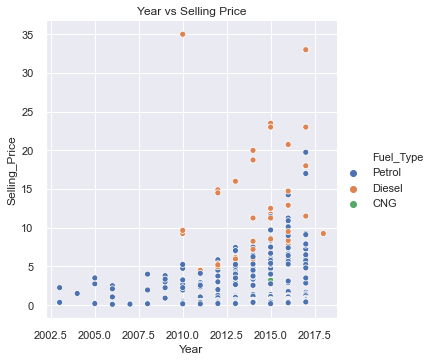

In [11]:
# Visualize the data distribution between Selling_price and Year using Fuel_type as hue.
# Another conclusion which can be drawn is that Diesel cars tend to sell at higher rate compared to Petrol and diesel
sns.relplot(x="Year", y="Selling_Price", data=dataset, hue="Fuel_Type")
plt.title("Year vs Selling Price")

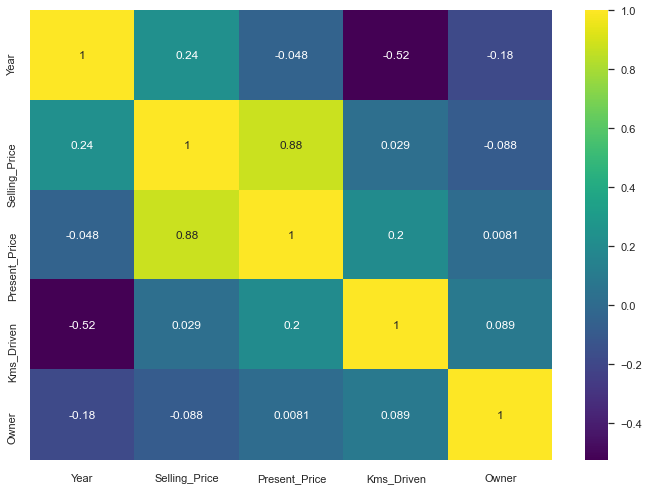

In [12]:
# Create a co-relation matrix using seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='viridis') # Change value of cmap to change the color of heatmap

## Feature Engineering

In [13]:
# Lets remove some un-wanted features from dataset like Car_name
# Each car name is unique and does not contribute to predicting the selling price of car
columns = [i for i in dataset.columns.to_list() if not str(i)=="Car_Name"]
final_dataset = dataset[columns]

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
# Add an additional column for current year
final_dataset["Current Year"] = 2020
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [16]:
# Create an additional feature called NO_Years which will tell us how many years does the owner had car.
# This step of creating new features using old features is called as Feature engineering.
final_dataset["NO_Years"] = final_dataset["Current Year"] - final_dataset["Year"]
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,NO_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [17]:
# Since we created a new feature we do not need Year and Current Year feature
final_dataset.drop("Year", inplace=True, axis=1)
final_dataset.drop("Current Year", inplace=True, axis=1)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NO_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


### Encoding

> <i>Next step is to process Categories in our dataset (classes).</i> <br/> <br/>
<b> Solution</b><br/>
> There are 2 ways to perform Label encoding and OneHotEncoding 
1. Use Sklearn's LabelEncoder and OneHotEncoder to create labels 
2. Use pandas inbuilt function to handle this 

<b><i><u> Note</u>: Please remove one column each time you perform encode one column you need to avoid dummy variable trap by removing one column. </i></b><br/>  
![text](https://miro.medium.com/max/1200/0*T5jaa2othYfXZX9W.)

In [19]:
# Encode categories using pandas function
final_dataset = pd.get_dummies(final_dataset, drop_first=True) # Drop_First automatically drops 1 column each time it converts one column into several others.

In [20]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,NO_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


Text(0.5, 1.0, 'Correlation Map')

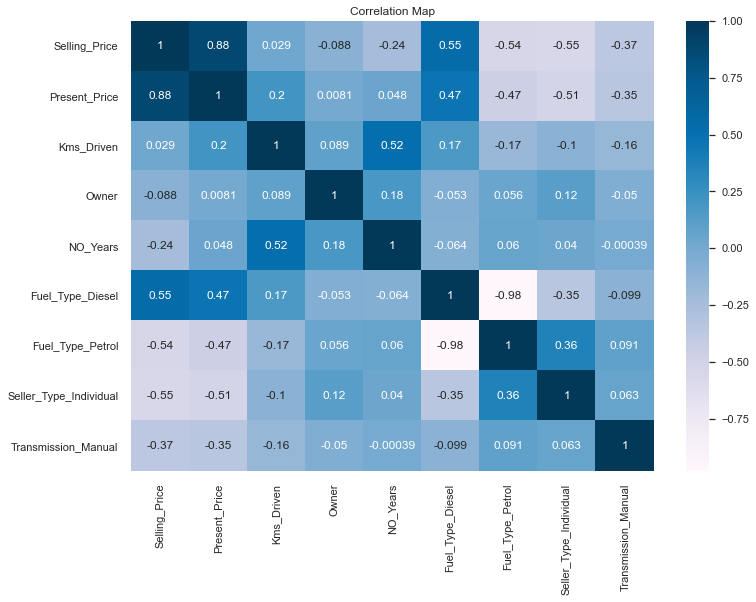

In [21]:
# lets again see the heatmap of new features
sns.heatmap(final_dataset.corr(), annot=True, cmap="PuBu")
plt.title("Correlation Map")

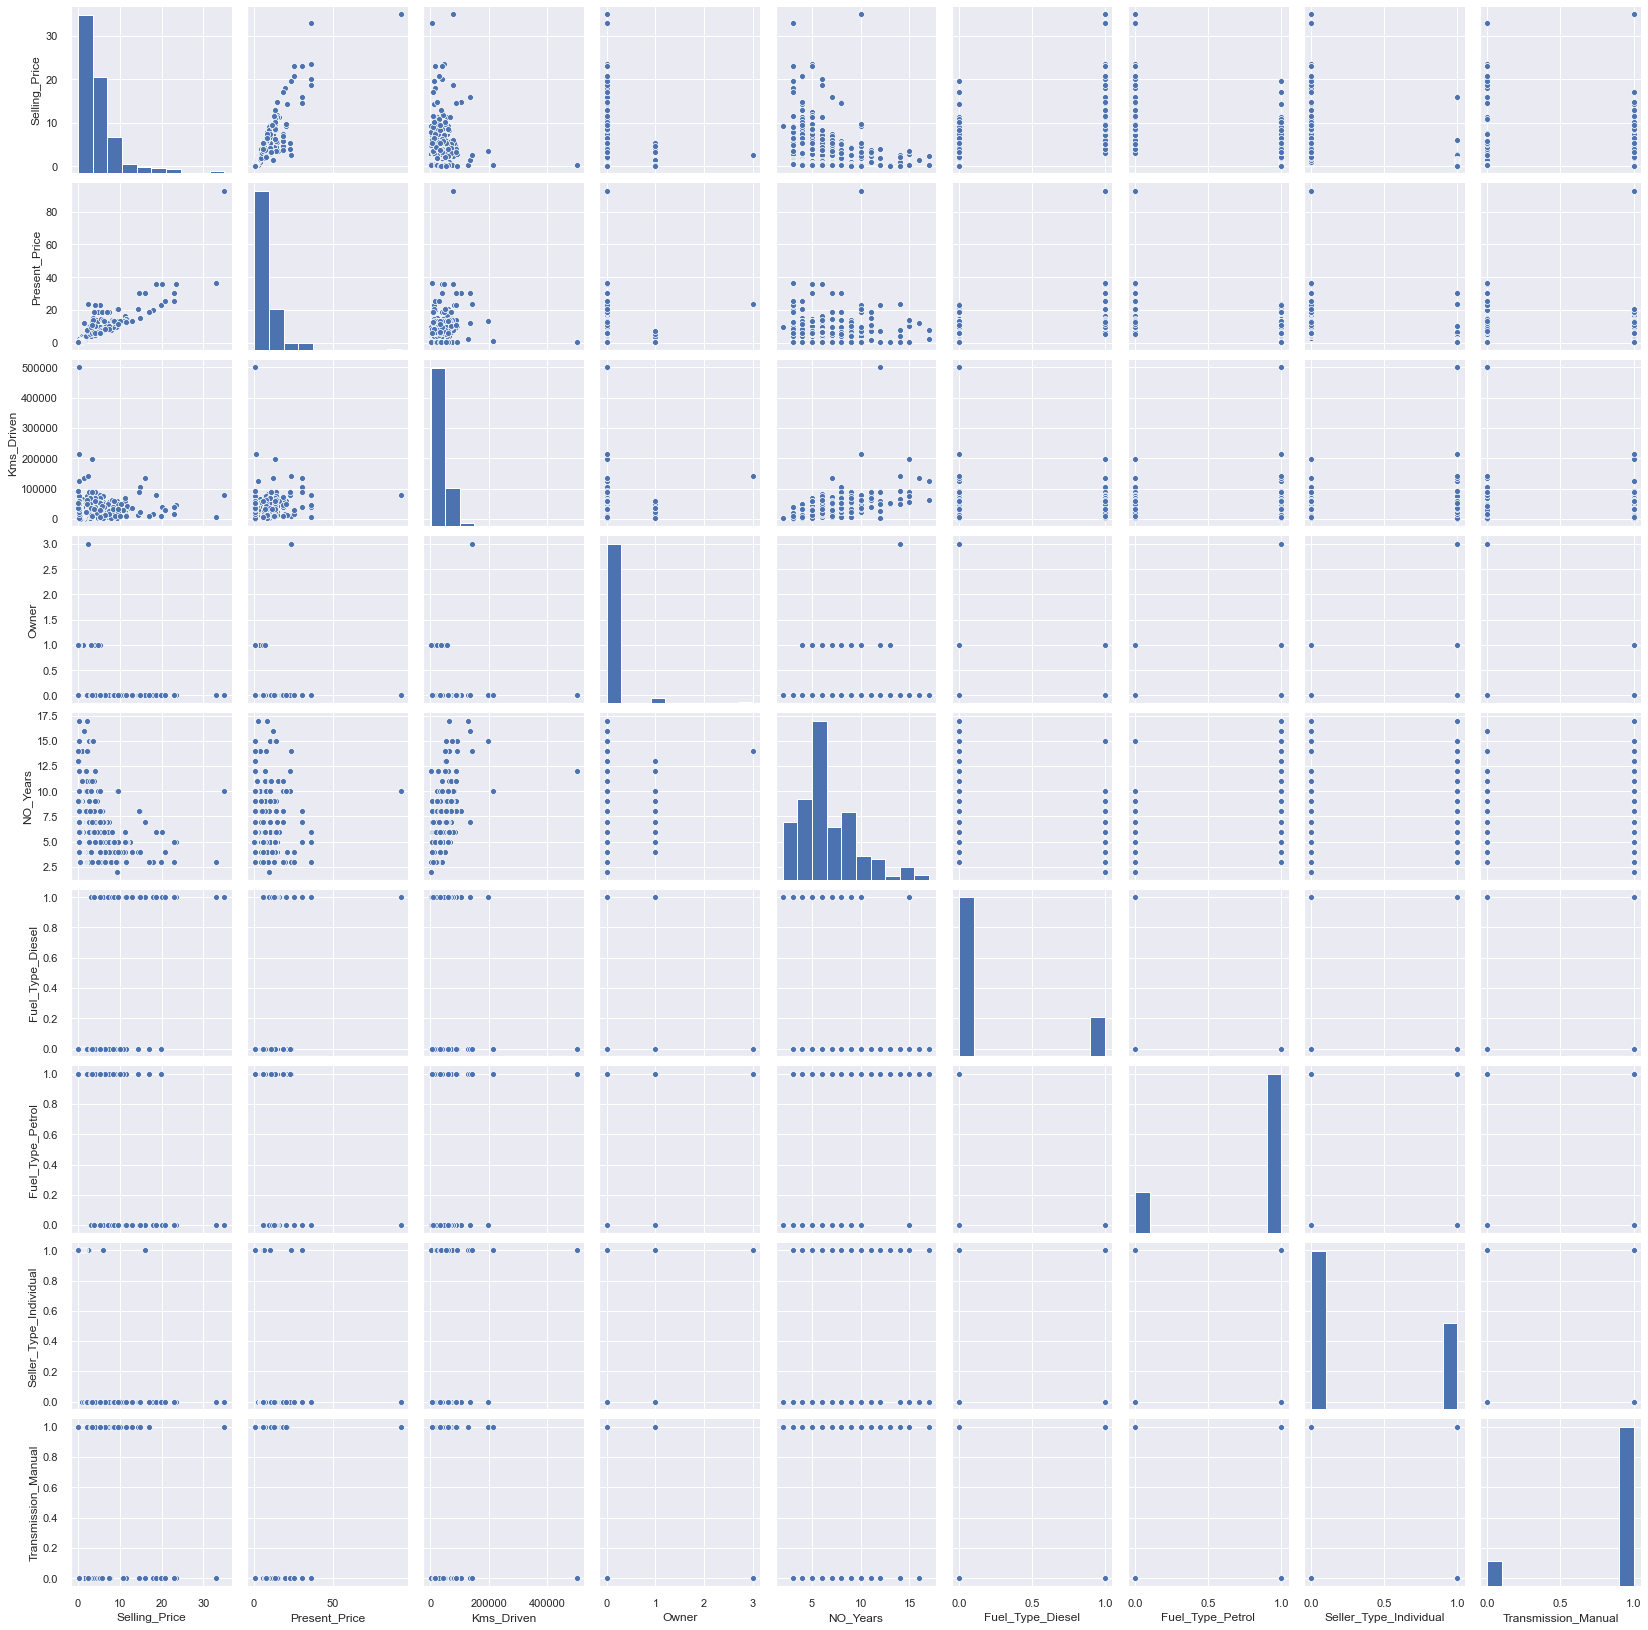

In [22]:
# To visualize relationship between various variables use pairplot function of seaborn to visualize set of plots
sns.pairplot(final_dataset)

## Creating Machine Learning Model

In [23]:
# Lets seperate independent and dependent variables
X = final_dataset.iloc[:, 1:] # First part is to index rows and 2nd part is to index columns
y = final_dataset.iloc[:, 0] 

###  How to extract Important Features from dataset? 

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
extra = ExtraTreesRegressor()
extra.fit(X,y)

ExtraTreesRegressor()

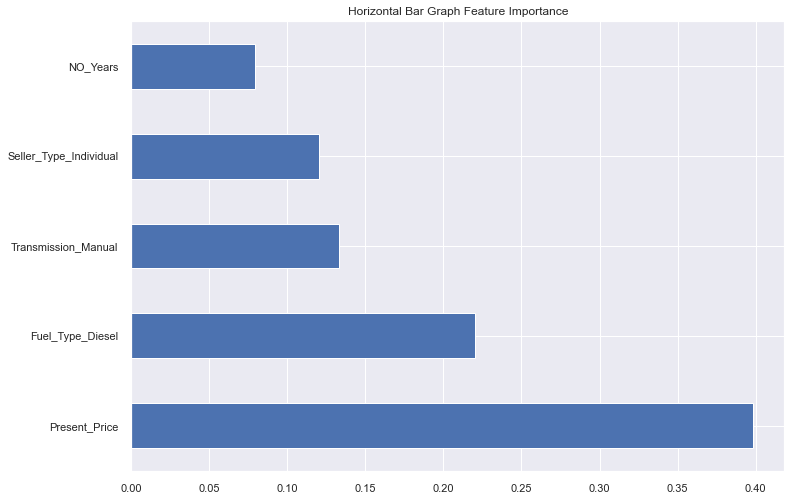

In [25]:
# Display which features are important and how much they are important
features = pd.Series(extra.feature_importances_, index=X.columns)
features.nlargest(5).plot(kind='barh')
plt.title("Horizontal Bar Graph Feature Importance")
plt.show()

### Tip:
> You can use Decision tree regressior or RandomForestRegressor to get feature names

In [26]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [27]:
# Let's use another ensamble algorithm: RandomForestRegressor
# import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
## Select Hyperparameters for the model
# Number of trees 
n_estimator = [int(i) for i in np.linspace(start=100, stop=1200, num=12)]

# Number of features to consider at every split
max_features =['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(5,20, num=6)]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

### Note:
1. <b>RandomizedSearchCV</b><br/>
It uses a random set of hyperparameters. Useful when there are many hyperparameters, so the search space is large. Can be used if you have a prior belief on what the hyperparameters should be
<br/><br/>
2. <b> GridSearchCV </b><br/>
Creates a grid over the search space and evaluates the model for all of the possible hyperparameters in the space. Good in the sense that it is simple and exhaustive. On the minus side, it may be prohibitively expensive in computation time if the search space is large (e.g. very many hyper parameters).
<br/>

> <b>Source</b>: <a href=https://stackoverflow.com/questions/57426633/what-is-randomsearchcv-and-gridsearchcv> What is RandomSearchCV and GridSearchCV?</a> 


In [29]:
# HyperParameter model to select best set of parameters for the XGBoost model
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators':n_estimator,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf}
print(random_search)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 8, 11, 14, 17, 20], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
# Intiate RandomSearchCV algorithm to find best hyperparameters
# First create the base model
rfr_model = RandomForestRegressor()

In [31]:
rfr_random = RandomizedSearchCV(estimator=rfr_model, param_distributions=random_search, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [32]:
rfr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=8, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=8, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=8 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=8, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=8 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=8, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=8 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=8, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=11 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=11, total=   2.7s
[CV] n_estimators=1100, min_samples_split=10, min_sampl

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 8, 11, 14, 17, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [33]:
# Predict the values
y_pred = rfr_random.predict(X_test)

Text(0.5, 1.0, 'Difference between Actual vs Predicted Values')

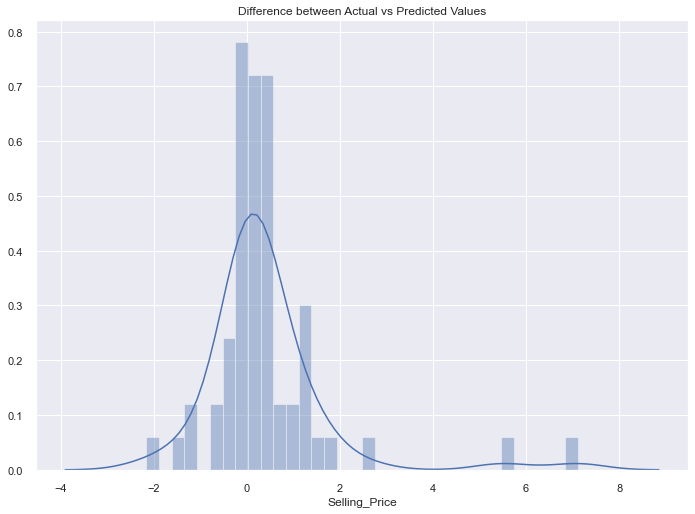

In [34]:
sns.distplot(y_test-y_pred)
plt.title("Difference between Actual vs Predicted Values")

### Note:
> Here the curve looks like a normal curve (bellman distribution curve) which indicates that our model is doing a good job at predicting

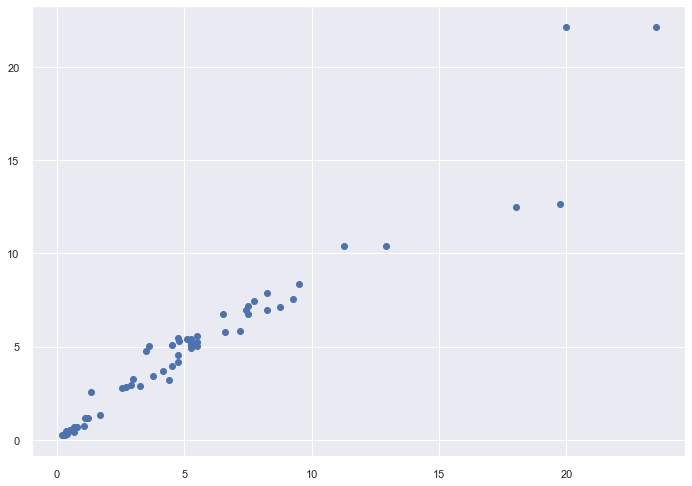

In [35]:
plt.scatter(y_test, y_pred)

### Export the model in pickle file

In [36]:
import pickle
fp = open('rfr_model.pkl', 'wb')
pickle.dump(rfr_random, fp)

### Note: 
> I tried using XgBoost Regressor as model but gives error while predicting values from user queries. <br/>
<b>Error</b><br/>
<i>ValueError: feature_names mismatch:</i>